In [2]:
import numpy as np

np.random.seed(327)

N = 100  
R_values = [10, 100, 1000, 10000, 100000] 

def generate_random_steps(size):
    u_samples = np.random.random(size)  
    return np.arccos(1 - 2 * u_samples) / np.pi  

mean_results = []
std_results = []

for R in R_values:
    # Generate R 100-step random walks
    walks = np.array([np.sum(generate_random_steps(N)) for _ in range(R)])
    
    # Compute mean and standard deviation
    mean_X_R = np.mean(walks)
    std_X_R = np.sqrt(np.mean(walks**2) - mean_X_R**2) 
    
    mean_results.append(round(mean_X_R, 5))
    std_results.append(round(std_X_R, 5))

mean_results = np.array(mean_results)
std_results = np.array(std_results)

# Predictions
mu_exact = N / 2  
sigma_exact = np.sqrt(1/2 - 2/np.pi**2) * np.sqrt(N) 

print("Numerical Means:", mean_results)
print("Numerical Standard Deviations:", std_results)
print("Mean:", round(mu_exact, 5))
print("Standard Deviation:", round(sigma_exact, 5))


Numerical Means: [50.33188 49.98433 49.99705 50.03574 49.99146]
Numerical Standard Deviations: [2.47978 2.23935 2.20008 2.1744  2.1734 ]
Mean: 50.0
Standard Deviation: 5.45305


For ⟨X(N)⟩, The numerical values are very close to 50.0 for all R. And even for small R, the fluctuations are minor.  
For ℓ2(N), The numerical values converge to the exact value 2.176. And the deviations become slighter as R increases.

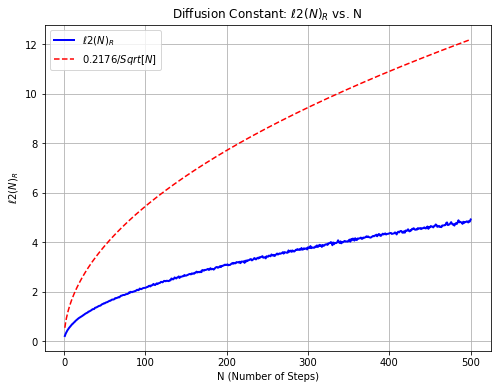

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(327)

R = 10000  
N_values = np.arange(1, 501)  

def generate_random_steps(size):
    u_samples = np.random.random(size)  
    return np.arccos(1 - 2 * u_samples) / np.pi  

diffusion_lengths = []

# Compute ℓ₂(N)_R for each N
for N in N_values:
    walks = np.array([np.sum(generate_random_steps(N)) for _ in range(R)])
    
    mean_X_R = np.mean(walks)
    std_X_R = np.sqrt(np.mean(walks**2) - mean_X_R**2) 
    
    diffusion_lengths.append(std_X_R)

diffusion_lengths = np.array(diffusion_lengths)

plt.figure(figsize=(8, 6))
plt.plot(N_values, diffusion_lengths, label=r"$ℓ2(N)_R$", color='b', linewidth=2)
plt.plot(N_values, np.sqrt(1/2 - 2/np.pi**2) * np.sqrt(N_values), 'r--', label=r"$0.2176/Sqrt[N]$")

plt.xlabel("N (Number of Steps)")
plt.ylabel(r"$ℓ2(N)_R$")
plt.title("Diffusion Constant: $ℓ2(N)_R$ vs. N")
plt.legend()
plt.grid()
plt.show()

Fitted D: 0.217456
Fitted C: 0.500072


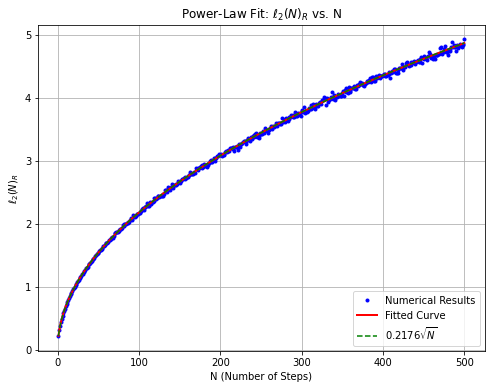

In [8]:
# Use log transformation to fit ℓ₂(N)_R
log_N = np.log(N_values)
log_L2 = np.log(diffusion_lengths)

fit_output = np.polyfit(log_N, log_L2, 1)
D_fit = fit_output[-2]  
C_fit_log = fit_output[-1] 

C_fit = np.exp(C_fit_log)

print(f"Fitted D: {C_fit:.6f}")
print(f"Fitted C: {D_fit:.6f}")

fit_curve = C_fit * N_values**D_fit

plt.figure(figsize=(8, 6))
plt.plot(N_values, diffusion_lengths, linestyle='None', marker='.', label="Numerical Results", color='b')
plt.plot(N_values, fit_curve, 'r-', label="Fitted Curve", linewidth=2)
plt.plot(N_values, 0.2176 * np.sqrt(N_values), 'g--', label=r"$0.2176\sqrt{N}$")

plt.xlabel("N (Number of Steps)")
plt.ylabel(r"$\ell_2(N)_R$")
plt.title("Power-Law Fit: $\ell_2(N)_R$ vs. N")
plt.legend(loc="lower right")
plt.grid()
plt.show()

The fit results for C and D align closely with my analytic predictions from the central limit theorem.  
D aligns perfectly with the prediction and C is close to 0, which aligns with the expectation that for large N, ℓ2(N) ∝ N^(1/2)